In [18]:
%pylab
%matplotlib qt

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from scipy.optimize import curve_fit

In [5]:
data = load('../Re _Temperature_for_fit/Temperature_DC05V_RF64V.npz')
time = data['time']
Temp = data['temperature']
i = argmin(abs(time-0.002))


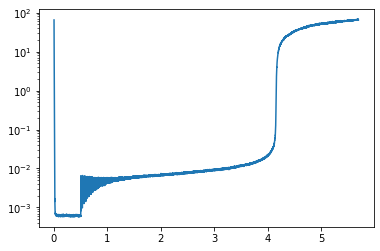

In [6]:
figure(0); clf()
semilogy(time*1e3,Temp)


In [7]:
x0 = (time[i:]-time[i])*1e3
y0 = log10(Temp[i:])
imax = argmax(diff(y0))

$$
T(t, a,b,c,d)= 10^{\frac{a(t-t_0)}{(c+(t-t_0)^2)^{d}}+b}
$$

In [8]:
def func2(t, t0, A, B,  C, D):
    return A*(t-t0) / (C+(t-t0)**2)**D + B

def dfunc2_dt(t, t0, A, B,  C, D):
    return 10**(A*(C + (t - t0)**2)**(-D)*(t - t0) + B)*(-A*D*(C + (t - t0)**2)**(-D)*(t - t0)*(2*t - 2*t0)/(C + (t - t0)**2) + A*(C + (t - t0)**2)**(-D))*log(10)

In [9]:
t0 = x0[imax]
A  = 1
B  = 0
C  = 1
D  = 1/2.5
p0 = array([t0,A, B,  C, D])
popt, pcov = curve_fit(func2, x0, y0, p0)
t0, A, B, C, D = popt[0], popt[1], popt[2], popt[3], popt[4]
y1 = func2(x0,t0, A, B, C, D)
Temp_fit = 10**(y1)

dt = (x0[1] - x0[0])*1e-3 # Because I had put x0 in ms
dT_dt = 1e3*dfunc2_dt(x0,t0, A, B, C, D)

/tmp/ipykernel_204157/3628520452.py:2: RuntimeWarning: invalid value encountered in power
  return A*(t-t0) / (C+(t-t0)**2)**D + B


In [10]:
C

0.00022282844374599367

In [11]:
tmax = t0 + sqrt(0.80445*C)
dT_dt_tmax = 1.0e3*dfunc2_dt(tmax,t0, A, B, C, D)
T_tmax     = 10**func2(tmax,t0, A, B, C, D)
# dT_dt_tmax = (10**(B + 2**(-D)*A*C**(1/2 - D))*2**(-D)*A*C**(-D)*(1 - D)*log(10))*1e3
# T_tmax     = 10**(B + 2**(-D)*A*C**(1/2 - D))

print(T_tmax)

4.652893009076305


In [12]:
dT_dt_tmax2 = 1.0e3*dfunc2_dt(t0,t0, A, B, C, D)
T_tmax2     = 10**func2(t0,t0, A, B, C, D)
print(T_tmax2)

0.724528316786703


In [13]:
tmax3 = t0 + 0.5*sqrt(3)*sqrt(C)/sqrt(abs(2*D - 1))
dT_dt_tmax3 = 1.0e3*dfunc2_dt(tmax3,t0, A, B, C, D)
T_tmax3     = 10**func2(tmax3,t0, A, B, C, D)
tmax3

2.196205441060345

In [14]:
sqrt(3)*sqrt(C)/(1j*sqrt((1-2*D)))

-0.07742560666066543j

In [15]:
tmax -t0

0.013388589976971677

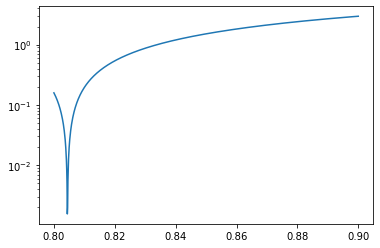

In [16]:
m = linspace(0.8, 0.9, 1000)
test = (C*(m + 1))**(-D - 4)*(A*C**4*(m + 1)**2*(2*D*m - m - 1)**2*log(10) + 2*C**(3/2)*D*sqrt(m)*(C*(m + 1))**(D + 2)*(2*D*m - m - 3))
figure('test'); clf();
semilogy(m,abs(test))

In [19]:
figure(3); clf()
subplot(221)
semilogy(x0,Temp[i:], label='Data')
semilogy(x0,Temp_fit , label='Fit')
grid()
xlabel('time[ms]')
ylabel('Temperature[K]')

subplot(223)
semilogy(x0,dT_dt*1e-3,label='x/(1+x^2)')
semilogy(tmax,dT_dt_tmax*1e-3,'o',label='x/(1+x^2)')
semilogy(t0,dT_dt_tmax2*1e-3,'s',label='x/(1+x^2)')
xlabel('time[ms]')
ylabel('Heating Rate [K/ms]')
grid()

subplot(222)
semilogx(Temp_fit, dT_dt*1e-3 )
semilogx(T_tmax, dT_dt_tmax*1e-3,'o')
semilogx(T_tmax2, dT_dt_tmax2*1e-3,'s')
xlabel('T[K]')
ylabel('Heating Rate [K/ms]')
grid()

subplot(224)
semilogx(Temp_fit, dT_dt*1e-3/Temp_fit )
semilogx(T_tmax, dT_dt_tmax*1e-3/T_tmax,'o')
semilogx(T_tmax2, dT_dt_tmax2*1e-3/T_tmax2,'s')
xlabel('T[K]')
ylabel('Heating Rate [K/ms] / T[K]')
grid()

In [20]:
savefig('Heating_Rate_from_Fit.png')